In [ ]:

def generate_circles_data(n_samples=200, noise=0.1, random_state=42):
    """
    Generate concentric circles dataset for binary classification.
    
    Parameters:
    - n_samples: Number of samples per class (total = 2 * n_samples)
    - noise: Amount of noise to add
    - random_state: Random seed for reproducibility
    
    Returns:
    - X: Input features (2, n_samples*2) - 2D coordinates
    - y: Labels (1, n_samples*2) - 0 for inner circle, 1 for outer circle
    """
    np.random.seed(random_state)
    
    # Inner circle (class 0)
    theta_inner = np.random.uniform(0, 2*np.pi, n_samples)
    r_inner = np.random.uniform(0, 0.5, n_samples)  # Radius 0 to 0.5
    X_inner = np.array([
        r_inner * np.cos(theta_inner) + np.random.normal(0, noise, n_samples),
        r_inner * np.sin(theta_inner) + np.random.normal(0, noise, n_samples)
    ])
    y_inner = np.zeros((1, n_samples))
    
    # Outer circle (class 1)
    theta_outer = np.random.uniform(0, 2*np.pi, n_samples)
    r_outer = np.random.uniform(0.7, 1.0, n_samples)  # Radius 0.7 to 1.0
    X_outer = np.array([
        r_outer * np.cos(theta_outer) + np.random.normal(0, noise, n_samples),
        r_outer * np.sin(theta_outer) + np.random.normal(0, noise, n_samples)
    ])
    y_outer = np.ones((1, n_samples))
    
    # Combine and shuffle
    X = np.hstack([X_inner, X_outer])
    y = np.hstack([y_inner, y_outer])
    
    # Shuffle the data
    indices = np.random.permutation(X.shape[1])
    X = X[:, indices]
    y = y[:, indices]
    
    return X, y

# Generate the dataset
X_circles, y_circles = generate_circles_data(n_samples=100, noise=0.05)
print(f"Circles dataset shape: X={X_circles.shape}, y={y_circles.shape}")
print(f"Total samples: {X_circles.shape[1]}")
print(f"Class distribution: Class 0 (inner): {np.sum(y_circles == 0)}, Class 1 (outer): {np.sum(y_circles == 1)}")

# Normalize the data (important for neural networks)
X_circles_mean = np.mean(X_circles, axis=1, keepdims=True)
X_circles_std = np.std(X_circles, axis=1, keepdims=True)
X_circles_norm = (X_circles - X_circles_mean) / (X_circles_std + 1e-8)

# Train the MLP
print("\n--- Training on Concentric Circles Problem ---")
mlp_circles = MLP(input_size=2, hidden_size=8, output_size=1, learning_rate=0.1)
mlp_circles.fit(X_circles_norm, y_circles, n_epochs=5000)

# Make predictions
predictions = mlp_circles.forward(X_circles_norm)
predictions_binary = (predictions > 0.5).astype(int)

# Calculate accuracy
accuracy = np.mean(predictions_binary == y_circles)
print(f"\n--- Results ---")
print(f"Training Accuracy: {accuracy * 100:.2f}%")
print(f"Sample predictions (first 10):")
print(f"  True labels:    {y_circles[0, :10]}")
print(f"  Predictions:    {predictions_binary[0, :10]}")
print(f"  Probabilities:   {predictions[0, :10].round(3)}")


Circles dataset shape: X=(2, 200), y=(1, 200)
Total samples: 200
Class distribution: Class 0 (inner): 100, Class 1 (outer): 100

--- Training on Concentric Circles Problem ---
Training for 5000 epochs...
  Epoch 0, Loss: 0.250001
  Epoch 1000, Loss: 0.249981
  Epoch 2000, Loss: 0.249908
  Epoch 3000, Loss: 0.249582
  Epoch 4000, Loss: 0.248453
Training complete. Final Loss: 0.246412

--- Results ---
Training Accuracy: 62.00%
Sample predictions (first 10):
  True labels:    [1. 1. 0. 1. 1. 1. 0. 1. 0. 0.]
  Predictions:    [0 0 0 1 1 0 1 0 0 0]
  Probabilities:   [0.426 0.45  0.488 0.54  0.545 0.481 0.539 0.45  0.487 0.459]


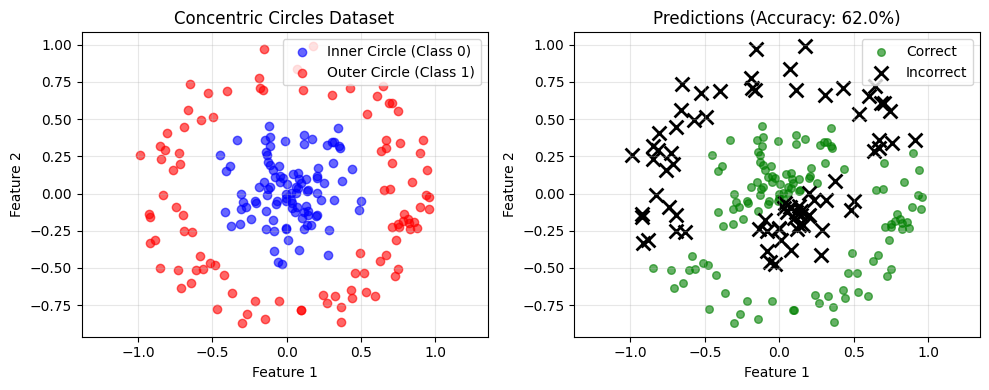

In [8]:
# Optional: Visualize the circles dataset (requires matplotlib)
# Uncomment to see the data and decision boundary

try:
    import matplotlib.pyplot as plt
    
    # Plot the circles dataset
    plt.figure(figsize=(10, 4))
    
    # Plot 1: Original data
    plt.subplot(1, 2, 1)
    inner_mask = y_circles[0] == 0
    outer_mask = y_circles[0] == 1
    plt.scatter(X_circles[0, inner_mask], X_circles[1, inner_mask], 
                c='blue', label='Inner Circle (Class 0)', alpha=0.6)
    plt.scatter(X_circles[0, outer_mask], X_circles[1, outer_mask], 
                c='red', label='Outer Circle (Class 1)', alpha=0.6)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Concentric Circles Dataset')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    
    # Plot 2: Predictions
    plt.subplot(1, 2, 2)
    correct_mask = predictions_binary[0] == y_circles[0]
    incorrect_mask = predictions_binary[0] != y_circles[0]
    
    # Plot correct predictions
    plt.scatter(X_circles[0, correct_mask], X_circles[1, correct_mask], 
                c='green', marker='o', label='Correct', alpha=0.6, s=30)
    # Plot incorrect predictions
    plt.scatter(X_circles[0, incorrect_mask], X_circles[1, incorrect_mask], 
                c='black', marker='x', label='Incorrect', s=100, linewidths=2)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Predictions (Accuracy: {accuracy*100:.1f}%)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    
    plt.tight_layout()
    plt.show()
    
except ImportError:
    print("Matplotlib not available. Install with: pip install matplotlib")
